# Ejercicio 2
Contenido del dataset: Resumen: Datos experimentales utilizados para la clasificación binaria (ocupación de la habitación) de temperatura, humedad, luz y CO2. La ocupación real se obtuvo a partir de imágenes con marca de tiempo que se tomaron cada minuto.
El ejercicio consiste obtener un modelo de clasificación para clasificar en si está ocupada (clase positiva) o no lo está, usando SVM y optimizando con  rejilla (GridSearchCV) los hiperparámetros C y kernel.
El dataset está en formato de texto, pero se puede cargar como archivo csv, y contiene un conjunto de entrenamiento (datatraining.txt) dos conjuntos de test (datatest.txt y datatest2.txt) aunque vamos a usar solo el primero (datatest.txt). Contiene 6 atributos y la clase. Como el primero es la fecha y hora habría que eliminarlo. Los atributos son: fecha, temperatura, humedad, iluminación, CO2, ratio de humedad y etiqueta/clase
*   URL: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+#
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip

**Tomando como base el ejemplo6 de los suministrados en clase (apartado de rejilla con SVC)** implementar un clasificador basado en el SVM No lineal (SVC)  que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento para escalar los datos.
*   Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]
*   Entrenar el modelo y mostrar los mejores parámetros.
*   Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtenerPara los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.


In [19]:
import pandas as pd

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

In [2]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
unzip occupancy_data.zip

--2023-11-30 19:03:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/00357/occupancy_data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252, 128.195.25.66, 35.208.29.18, ...
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘occupancy_data.zip’

     0K .......... .......... .......... .......... ..........  133K
    50K .......... .......... .......... .......... ..........  249K
   100K .......... .......... .......... .......... .......... 5.84M
   150K .......... .......... .......... .......... ..........  273K
   200K .......... .......... .......... .......... .......... 5.48M
   250K .......... .......... .......... .......... .......... 5.39M
   300K .......... .......... .......                          6.82M=0.8s

2023-11-30 19:03:33 (416 KB/s) - ‘occupancy_data.zip’ saved [335713]



Archive:  occupancy_data.zip
  inflating: datatest.txt            
  inflating: datatest2.txt           
  inflating: datatraining.txt        


In [2]:
occupancy_train = pd.read_csv("datatraining.txt")

In [3]:
occupancy_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
occupancy_test = pd.read_csv("datatest.txt")

In [5]:
occupancy_test.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [9]:
#Como nos suministran los datos separados en test y entrenamiento, no hay que hacer partición del dataset en test y entrenamiento, como en el ejercicio 1
#Ahora habría la fecha de los conjuntos test y entrenamiento.
#Después habría que separar en los conjuntos de entrenamiento y test, los datos de las etiquetas/clases
#Para estas dos acciones, ver el código suministrado del ejercicio 1.
#Así se obtendrán los conjuntos X_train, X_test, y_train, y_test

# Se elimina la primera columna (fecha y hora) y la última (clase) para separar los atributos de la clase.
X_train = occupancy_train.drop(['date', 'Occupancy'], axis=1)
# X_train.head()

y_train = occupancy_train['Occupancy']
# y_train.head()

X_test = occupancy_test.drop(['date', 'Occupancy'], axis=1)
# X_test.head()

y_test = occupancy_test['Occupancy']
y_test.head()


140    1
141    1
142    1
143    1
144    1
Name: Occupancy, dtype: int64

### Uso de StandardScaler en el preprocesamiento para escalar los datos.

In [9]:
#Una vez obtenidos los conjuntos de test y de entrenamiento, hay que aplicar el escalado con StandarScaler (no vamos a usar pipe).
#Para aplicarlo por ejemplo en X_train --> X_train = StandardScaler().fit_transform(X_train)

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

### Una vez escalados los datos, definir la rejilla con los siguientes parámetros: 'C':[0.01,0.1,1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]

In [13]:
param_grid = {'C':[0.01, 0.1, 1, 2], 'kernel': ["linear", "poly", "rbf", "sigmoid"]}
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=3, verbose=2, return_train_score=True)

### Entrenar el modelo y mostrar los mejores parámetros.

In [14]:
# Entrenar el modelo y mostrar los mejores resultados
grid.fit(X_train, y_train)
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'C': 0.01, 'kernel': 'linear'}


### Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.

In [16]:
# Crear un modelo SVC con los mejores parámetros
best_svc_model = GridSearchCV(SVC(C=0.01, kernel='linear', random_state=42), param_grid, cv=3, verbose=2, return_train_score=True)
best_svc_model.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..............................C=0.01, kernel=linear; total time=   0.6s
[CV] END ..............................C=0.01, kernel=linear; total time=   2.7s
[CV] END ..............................C=0.01, kernel=linear; total time=   1.4s
[CV] END ................................C=0.01, kernel=poly; total time=   0.2s
[CV] END ................................C=0.01, kernel=poly; total time=   0.3s
[CV] END ................................C=0.01, kernel=poly; total time=   0.3s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.5s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.4s
[CV] END .................................C=0.01, kernel=rbf; total time=   1.2s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   2.3s
[CV] END .............................C=0.01, kernel=sigmoid; total time=   2.5s
[CV] END .............................C=0.01, ke

GridSearchCV(cv=3, estimator=SVC(C=0.01, kernel='linear', random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, verbose=2)

Matriz de Confusión:
[[1639   54]
 [   3  969]]

Métricas de Rendimiento:
Accuracy:  0.9786116322701689
Precision:  0.9472140762463344
Recall:  0.9969135802469136
F1:  0.9714285714285715


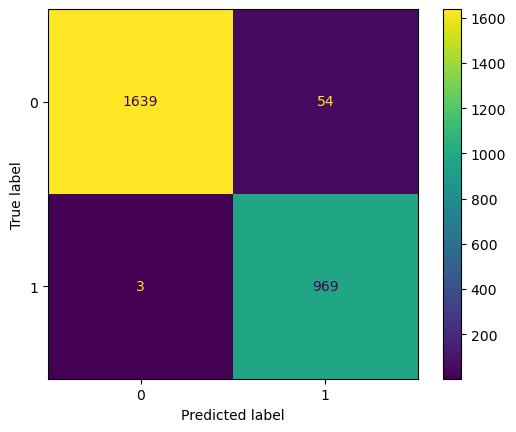

In [17]:
y_pred_svc = best_svc_model.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print("Matriz de Confusión:")
print(cm_svc)

cm_display_svc = ConfusionMatrixDisplay(cm_svc).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_svc)
precision = precision_score(y_test, y_pred_svc)
recall = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

### Implementar un clasificador basado en un árbol de decisión, a partir de los datos ya preprocesados para el clasificador anterior, usando una rejilla con los siguientes parámetros: 'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6] y obtener. Para los mejores parámetros obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.

In [20]:
param_grid = {'max_leaf_nodes': list(range(3, 30)), 'min_samples_split': [2, 3, 4, 5, 6]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, verbose=2, return_train_score=True)

# Entrenar el modelo y mostrar los mejores resultados
grid.fit(X_train, y_train)
print("Mejores parámetros: {}".format(grid.best_params_))

Fitting 3 folds for each of 135 candidates, totalling 405 fits
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_s

In [21]:
print("Mejores parámetros: {}".format(grid.best_params_))

Mejores parámetros: {'max_leaf_nodes': 3, 'min_samples_split': 2}


In [22]:
# Crear un modelo DecisionTreeClassifier con los mejores parámetros
best_tree_model = GridSearchCV(DecisionTreeClassifier(max_leaf_nodes=3, min_samples_split=2, random_state=42), param_grid, cv=3, verbose=2, return_train_score=True)
best_tree_model.fit(X_train, y_train)

Fitting 3 folds for each of 135 candidates, totalling 405 fits
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=2; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=3; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=4; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_samples_split=5; total time=   0.0s
[CV] END ..............max_leaf_nodes=3, min_s

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(max_leaf_nodes=3,
                                              random_state=42),
             param_grid={'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                            14, 15, 16, 17, 18, 19, 20, 21, 22,
                                            23, 24, 25, 26, 27, 28, 29],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             return_train_score=True, verbose=2)

Matriz de Confusión:
[[1640   53]
 [   5  967]]

Métricas de Rendimiento:
Accuracy:  0.9782363977485928
Precision:  0.9480392156862745
Recall:  0.9948559670781894
F1:  0.9708835341365462


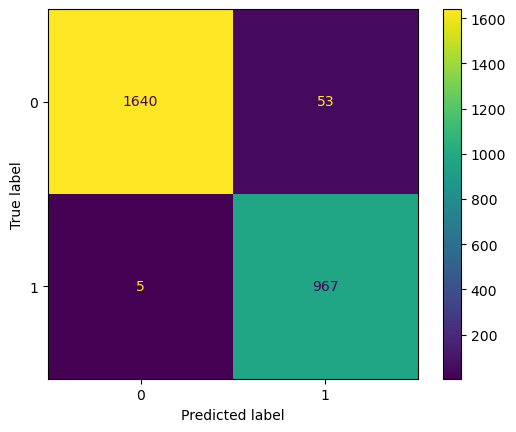

In [23]:
y_pred_tree = best_tree_model.predict(X_test)
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("Matriz de Confusión:")
print(cm_tree)

cm_display_tree = ConfusionMatrixDisplay(cm_tree).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

# Resumen del Notebook:

### Descargar y Cargar Conjunto de Datos
Se descargan y cargan los conjuntos de datos de ocupación desde UCI Machine Learning Repository.

### Preprocesamiento y División de Datos
Los datos se escalan con StandardScaler. El conjunto de datos ya estaba dividido en entrenamiento y prueba. Las fechas se eliminan y se separan los atributos de las clases.

### Construir y Entrenar el Modelo SVM
Se utiliza un clasificador SVM (Support Vector Machine) no lineal (SVC) con un escalador. Se realiza una búsqueda de hiperparámetros con GridSearchCV para encontrar los mejores parámetros del modelo.

### Entrenar el modelo con los mejores hiperparámetros
Una vez se saben los mejores hiperparámetros se entrena el modelo con la mejor configuración de hiperparámetros encontrada.

### Evaluar el Rendimiento del Modelo SVC
Se muestra la matriz de confusión y se calculan las métricas accuracy, precisión, recall y F1-score.

### Construir y Entrenar el Modelo de Árbol de Decisión
Se implementa un clasificador basado en un árbol de decisión con GridSearchCV para encontrar los mejores parámetros.

### Entrenar el modelo con los mejores hiperparámetros
Una vez se saben los mejores hiperparámetros se entrena el modelo con la mejor configuración de hiperparámetros encontrada.

### Evaluar el Rendimiento del Modelo de Árbol de Decisión
Se muestra la matriz de confusión y se calculan las métricas accuracy, precisión, recall y F1-score.


# Interpretación de Resultados:

Ambos clasificadores, SVC y Árbol de Decisión, muestran un buen rendimiento en la clasificación de ocupación. Aunque las matrices de confusión indican algunas diferencias, es importante considerar el desbalanceo en los datos. La paleta utilizada en la representación gráfica puede dar una impresión engañosa, ya que la segunda clase parece tener un rendimiento inferior. Sin embargo, la normalización de la matriz muestra que el rendimiento es muy positivo en ambas clases, tal y como pasaba en el Ejercicio 1.

## Resultados del Modelo SVM:

- **Accuracy:** El modelo predice correctamente el 97.86% de las instancias.
- **Precision:** Del total de instancias clasificadas como positivas, el 94.72% son realmente positivas.
- **Recall:** El modelo identifica correctamente el 99.69% de todas las instancias positivas.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 0.9714, demostrando un excelente equilibrio.

## Resultados del Modelo Árbol de Decisión:

- **Accuracy:** El modelo predice correctamente el 97.82% de las instancias.
- **Precision:** Del total de instancias clasificadas como positivas, el 94.80% son realmente positivas.
- **Recall:** El modelo identifica correctamente el 99.49% de todas las instancias positivas.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 0.9709, indicando un equilibrio similar al del SVM.

Ambos modelos demuestran un rendimiento sobresaliente, con métricas que sugieren una capacidad sólida para clasificar instancias positivas y negativas en un conjunto de datos desbalanceado. La diferencia en las métricas de ambos algoritmos es mínima.